<a href="https://colab.research.google.com/github/terenceneo/Airbnb-NYC-data-study/blob/master/A0164651E_EE4305_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this project we will implement a neural network (NN) architecture from scratch. Building the neural network will give a hands-on experience converting mathematical foundations of NN such as feed-forward and backpropagation algorithms into Python code. The project will also include implementation of sub-functions in NN such as loss functions, activation functions, and derivatives.

The model implemented will be tested on following examples:

#### Classification:

1. AND/OR Logic
2. XOR Logic

#### Regression:

1. Sinusoidal curve
2. Gaussian curve

The model will be evaluated on real world data using the Wisconsin Breast Cancer Dataset. 





### Problem Description

You are provided with a base Class for implementation of a simple Neural Network. You will also be provided with templates for some of the helper functions. You are required to implement functions in the Neural Network Class. You are also required to test your neural network with various datasets and show the effect of modifying parameters. Below is a list of problems that you are expected to solve in this Project:

1. Complete the implementation of Feedforward and Backpropagation
2. Implement functions for train, predict, and evaluate
3. Generate datasets for AND, XOR logics and Sinusoidal, Gaussian functions
4. Test your model using the above datasets. What are you choice of model parameters and how does it affect the performance?
5. Implement functions to improve model performance. What are your observations
6. Evaluate model performance on Wisconsin Breast Cancer dataset. What is the highest accuracy score obtained?

### Notes

1. Only following Python libraries (and their functions) are allowed: **numpy, pandas, matplotlib, seaborn.** (The code provided include the use of sklearn library for loading data, evaluation, and TSNE encoding. Do not load any other functions from sklearn.)
2. Following libraries from Python may not be used: **Keras, TensorFlow, pytorch, thean, scikit-learn (except functions that are already included)**
3. You may refer to online resources but do not copy+paste. All submitted items will be checked for Plagiarism.
4. The base class provided is for your reference. You are welcome to implement the NN algorithm differently. In that case, ensure that your implementation covers all the sub-problems. Also explain your methodology.

### Import Libraries

* numpy, pandas - Data handling and processing
* matplotlib, seaborn - Visualization
* tqdm - For implementing progressbars
* sklearn - datasets: to load breast cancer dataset, TSNE: for visualization


In [0]:
# Imports
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# self imported functions
# import cupy as np # for GPU
import pandas as pd # only used for data exploration

import pprint as pp # for printing results
# from sklearn.utils import shuffle # random shuffling for minibatch implementation

In [0]:
# set seed for reproducibility
np.random.seed(0)

### Phase 1: Implement and test a baseline Neural Network

#### 1.1 Activation functions and derivatives

In the below cell we define sigmoid activation function and its derivative

In [0]:
# Activation function
def sigmoid(t):
    '''1/(1+np.exp(-t))'''
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    '''
    sigmoid(p) * (1 - sigmoid(p))
    p = sigmoid(t)
    '''
    return p * (1 - p)

sigmoids = {"name": "sigmoid",
            "forward": sigmoid,
            "backward": sigmoid_derivative}

# Activation function # implement this
def relu(t):
    return np.where(t>0, t, 0) # t may be an array, cannot use max
    # if t > 0: return t
    # else: return 0

# Derivative of relu # implement this
def relu_derivative(p):
    '''p = relu(t)'''
    # return npint(p > 0) # 1 if p > 0, 0 otherwise
    return np.where(p>0, 1, 0)

relus = {"name": "relu",
         "forward": relu,
         "backward": relu_derivative}

# Activation function
def tanh(t):
    return (np.exp(t) - np.exp(-t)) / (np.exp(t) + np.exp(-t))
    
def tanh_derivative(p):
    return 1 - p**2

tanhs = {"name": "tanh",
         "forward": tanh,
         "backward": tanh_derivative}

#### 1.2 Loss functions and derivatives

In the below cell we define rmse loss function and its derivative

In [0]:
# Loss function - RMSE
def rmse(y, ypred):
    """ returns: scaler"""
    return np.sqrt(np.mean((y - ypred)**2))

# Loss function derivative - d MSE / d y_pred
def rmse_derivative(y, ypred):
    """returns: matrix size y.shape"""
    return 2*(y - ypred)

rmses = {"name": "rmse",
         "forward": rmse,
         "backward": rmse_derivative}

# Loss function - Cross Entropy # implement this
def cross_entropy(y, ypred):
    ypred1 = ypred.clip(min=1e-8,max=None)
    return (np.where(y==1,-np.log(ypred1), 0)).sum(axis=1).reshape(y.shape)

# Loss function derivative - Cross Entropy # implement this
def cross_entropy_derivative(y, ypred):
    ypred1 = ypred.clip(min=1e-8,max=None)
    return np.where(y==1, -1/ypred1, 0)

CE = {"name": "Cross Entropy",
      "forward": cross_entropy,
      "backward": cross_entropy_derivative}

#### 1.3 Base Class

Below is the base class implementation for Neural Network. Please add code whereever it reads **Write your code here**

In [477]:
print(np.random.binomial(1, 0.5, size=(4,4)))

[[1 1 1 1]
 [0 1 0 1]
 [1 0 1 1]
 [1 1 0 0]]


In [0]:
# Class definition
class NeuralNetwork:
    def __init__(self, x, y, learning_rate, lossfn = rmses, minibatch = 0):
        """
        Class initializer. Loads the value of input data and initializes weights

        Parameters:
        x: input data, matrix mxn
        y: ground truth label, matrix mx1
        hidden_nodes: scaler
        learning_rate: scaler

        Sets class parameters:
        self.x = input data, matrix mxn
        self.y = ground truth label, matrix mx1
        self.ypred = initialize prediction variable with zeros as the same shape as ground truth, matrix mx1

        self.weights = weights for each layer, matrix no. of nodes in prev layer, no. of nodes in layer
        self.bias = bias for each layer, matrix 1x number of nodes at layer

        self.hidden_nodes = number of nodes in the hidden layer, scaler
        """

        self.input_check(x, y)
        
        # self.weights1= np.random.rand(self.x.shape[1], self.hidden_nodes)
        # self.weights2 = np.random.rand(self.hidden_nodes, self.y.shape[1])

        # self.bias1 = np.random.rand(self.hidden_nodes)
        # self.bias2 = np.random.rand(1)

        self.weights = {}
        self.bias = {}

        self.lr = learning_rate

        # self.activation = np.vectorize(sigmoid)
        # self.activation_derivative = np.vectorize(sigmoid_derivative)
        self.activation_names = {}
        self.activation = {}
        self.activation_derivative = {}

        self.lossfn_name = lossfn["name"]
        self.lossfn = lossfn["forward"]
        self.lossfn_derivative = lossfn["backward"]

        self.dropoutmasks = {}

        self.layers = 0
        self.trained_epochs = 0

        self.hidden_nodes = [] # layer 0 is input x
        self.layer_outputs = {} # layer 0 is input x

        self.set_x(x)
        self.y = y
        self.ypred = np.zeros(y.shape)

        self.minibatch = minibatch if minibatch else self.x.shape[0]

    def get_weights(self, layer):
        if layer == -1: return self.weights
        return self.weights[layer]
    def get_bias(self, layer):
        if layer == -1: return self.bias
        return self.bias[layer]
    def get_architecture(self):
        return pd.DataFrame({"Layer": list(self.activation_names.keys()),
                             "Hidden nodes": self.hidden_nodes[1:],
                             "Activation function": list(self.activation_names.values())})

    def set_x(self, x):
        self.x = np.array(x, dtype=np.float32)
        if self.hidden_nodes:
            self.hidden_nodes[0] = self.x.shape[1]
        else:
            self.hidden_nodes = [self.x.shape[1]]
        self.layer_outputs[0] = self.x
    
    def add_layer(self, hidden_nodes, activation):
        self.layers += 1
        self.hidden_nodes.append(hidden_nodes) # layer 1 at hidden_nodes[1]
        
        self.weights[self.layers] = np.random.rand(self.hidden_nodes[self.layers-1], self.hidden_nodes[self.layers])
        self.bias[self.layers] = np.random.rand(self.hidden_nodes[self.layers])

        self.activation_names[self.layers] = activation["name"]
        self.activation[self.layers] = activation["forward"]
        self.activation_derivative[self.layers] = activation["backward"]
    
    def add_dropout(self, drop_prob):
        self.layers += 1
        keep_prob = 1-drop_prob

        self.hidden_nodes.append(self.hidden_nodes[self.layers-1]) # same number of hidden nodes as prev layer
        
        self.weights[self.layers] = np.identity(self.hidden_nodes[self.layers-1], dtype=float)
        self.bias[self.layers] = np.zeros(self.hidden_nodes[self.layers])

        self.activation_names[self.layers] = "dropout"
        self.activation[self.layers] = self.dropout_wrapper(keep_prob, self.layers)
        self.activation_derivative[self.layers] = lambda x: x
  
    def dropout_wrapper(self, keep_prob, layer): # activation function for dropout layer
        def dropout(layerout):
            if self.train_flag:
                self.dropoutmasks[layer] = np.random.binomial(1, keep_prob, size=layerout.shape) #todo: no context
                #  Avoid division by 0 when scaling
                if keep_prob > 0.0:
                    scale = (1/keep_prob)
                else:
                    scale = 0.0
                return self.dropoutmasks[layer] * layerout * scale
            else: # no dropout during predicting
                return layerout
        return dropout
    
    def input_check(self, x, y):
        """
        Checks shape of inputs
        x: input data, matrix mxn
        y: ground truth label, matrix mx1
        """
        if y.shape[1] != 1:
          raise Exception("Input y needs to have shape mx1, current shape:", y.shape)
        if x.shape[0] != y.shape[0]:
          raise Exception("X and y needs to have same number of rows, current x shape:", x.shape, "y shape:", y.shape)
        
    def feedforward(self):
        """
        Perform feedforward operation: input -> layer1 -> layer2
        
        HINT:
        layer1 = activation(weight1<dot>x + bias1)
        layer2 = activation(weight2<dot>x + bias2)

        For example: self.layer1 = sigmoid(np.dot(self.x, self.weights1) + self.bias1)

        Parameters:
        x: input data, matrix mxn
        y: ground truth label, matrix mx1

        Return:
        self.layer2: The output from layer2, matrix mx1
        """

        # Write your code here
        # # hidden layer 1
        # self.v1 = np.dot(self.x, self.weights1) + self.bias1 # matrix no. of nodes in layer 1 x 1
        # self.layer1 = self.activation(self.v1) # matrix m x no. of nodes in layer 1 

        # # output layer
        # self.v2 = np.dot(self.layer1, self.weights2) + self.bias2
        # self.layer2 = self.activation(self.v2)
        # return self.layer2

        # Generalise
        for layer in range(1, self.layers+1):
            self.layer_outputs[layer] = self.activation[layer](np.dot(self.layer_outputs[layer-1], self.weights[layer]) + self.bias[layer])
        
        return self.layer_outputs[self.layers]
        
    def backprop(self):
        """
        Perform backpropagation to update weights and bias: loss -> layer2 -> layer1
        
        HINT:
        d_loss = derivative of loss (example rmse_derivative), matrix m x 1
        d_weights2 = layer1_out <dot> d_loss*d_activation, matrix no. of nodes in prev layer x no. of nodes in layer 
        d_bias2 = I <dot> d_loss*d_activation, matrix 1x number of nodes at layer

        repeat for d_weights1 and d_bias1

        Update weights and bias based on the error and learning rate

        Updates:
        Model weights and biases
        """

        # Write your code here
        # compute gradients
        # see slide 27 28 29

        # # Base method
        # d_loss2 = rmse_derivative(self.y, self.layer2) # matrix m x 1
        # d_activation2 = self.activation_derivative(self.layer2) # matrix m x no. of nodes
        # d_error2 = d_loss2 * d_activation2 # matrix m x no. of nodes
        # d_weights2 = np.dot(self.layer1.T, d_error2) # layer1_out <dot> d_loss*d_activation, matrix prev layer x no. of nodes # todo: 1/m * whole thing??
        # d_bias2 = np.sum(d_error2, axis=0) # I <dot> d_loss*d_activation # todo: 1/m * whole thing??

        # d_loss1 = np.dot(d_error2, self.weights2.T) # matrix m x no. of nodes
        # d_activation1 = self.activation_derivative(self.layer1) # matrix m x no. of nodes
        # d_error1 = d_loss1 * d_activation1 # element wise multiply, matrix m x no. of nodes
        # d_weights1 = np.dot(self.x.T, d_error1)
        # d_bias1 =  np.sum(d_error1, axis=0) # matrix 1x number of nodes at layer

        # # Another try
        # # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        # d_weights2 = np.dot(self.layer1.T, (rmse_derivative(self.y, self.layer2) * sigmoid_derivative(self.layer2)))
        # d_weights1 = np.dot(self.x.T,  np.dot(rmse_derivative(self.y, self.layer2) * sigmoid_derivative(self.layer2), self.weights2.T) * sigmoid_derivative(self.layer1))

        # # update parameters
        # self.weights1 += self.lr * d_weights1
        # self.weights2 += self.lr * d_weights2 # lr * local gradient

        # self.bias1 += self.lr * d_bias1
        # self.bias2 += self.lr * d_bias2

        # Generalise
        d_loss = self.lossfn_derivative(self.layer_outputs[self.layers+1], self.layer_outputs[self.layers]) # matrix m x 1

        for layer in range(self.layers, 0, -1): # backwards till layer 1
            if self.activation_names[layer] == "dropout": continue

            d_activation = self.activation_derivative[layer](self.layer_outputs[layer]) # matrix m x no. of nodes
            d_error = d_loss * d_activation # matrix m x no. of nodes
            d_weights = np.dot(self.layer_outputs[layer-1].T, d_error) # layer1_out <dot> d_loss*d_activation, matrix prev layer x no. of nodes # todo: 1/m * whole thing??
            d_bias = np.sum(d_error, axis=0) # I <dot> d_loss*d_activation # todo: 1/m * whole thing??

            # update d_loss to pass to prev layer
            d_loss = np.dot(d_error, self.weights[layer].T) # matrix m x no. of nodes

            # update parameters
            self.weights[layer] += self.lr * d_weights
            self.bias[layer] += self.lr * d_bias

    def train(self, x, y):
        """
        Train the model based on training data passed as input
        
        HINT:
        Training involves two steps:
        output <- feedforward
        update_weights <- backpropagate

        Parameters:
        x: input data
        y: ground truth label

        Return: NONE

        Updates: prediction self.ypred
        """
        self.input_check(x, y)

        self.set_x(x)
        self.y = y

        self.train_flag = True # for dropout scaling
        # Write your code here

        # Randomise minibatch data every epoch
        indices = np.arange(self.x.shape[0])
        np.random.shuffle(indices)

        X_train = self.x[indices]
        y_train = self.y[indices]
        # X_train, y_train = shuffle(self.x, self.y)

        # Training on minibatch
        for i in range(0, X_train.shape[0], self.minibatch):
            # Get minibatch for training
            self.layer_outputs[0] = X_train[i:i + self.minibatch] # update input x for feedforward()
            self.layer_outputs[self.layers+1] = y_train[i:i + self.minibatch] # update output y for backprop()

            # predict
            self.ypred = self.feedforward() # must not modify self.x and self.y

            # backpropagate
            self.backprop() # must not modify self.x and self.y

        self.trained_epochs += 1
    
    def predict(self, x):
        """
        Predict the outcome for the given input using current model
        
        HINT:
        For prediction output is obtained by performing feedforward

        Parameters:
        x: input data

        Return: output prediction using the model (self.ypred)
        """
        self.set_x(x) # set input layer for feedforward()

        self.train_flag = False # for dropout scaling

        # Write your code here
        self.ypred = self.feedforward()
        return self.ypred

    def evaluate(self, x, y):
        """
        Compute the error for given ground truth and prediction obtained
        
        HINT:
        Training involves two steps:
        output <- feedforward
        update_weights <- backpropagate

        Parameters:
        y: ground truth, passed in when creating instance of class
        ypred: output prediction, generated after each train() call

        Return: prediction error self.loss
        """
        self.input_check(x, y)

        # self.y = y
        # self.ypred = ypred

        # write your code here
        self.loss = np.sum(self.lossfn(y, self.predict(x))) # self.ypred is modified
        return self.loss

#### 1.4 Backpropagation Algorithm

<img src="https://miro.medium.com/max/1742/1*FceBJSJ7j8jHjb4TmLV0Ew.png" width="600" />

Based on your code (The base NN class, activation, and loss functions) please explain how backpropagation works. Consider to explain the original algorithm and your code flow. Feel free to use mathematical equations, images, code outputs for your explanation.

You may consider the following reference:

1.   [BP Algorithm Implementation](http://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/)
2.   [How BP Algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)



#### 1.5: Classification Test

Setup data for AND logic and XOR logic. Train the model and observe if the model is able to correctly classify

For AND Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

For XOR Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |




##### 1.5.1 Initialization

In [0]:
from copy import deepcopy

def train(NN, epochs):
    history = {"loss": [], "weights": [], "bias": [], "test loss": []}

    #tqdm generates a progress bar
    for i in tqdm(range(epochs)):
        history["loss"].append(NN.evaluate(NN.x, NN.y))
        # history["weights"].append(NN.get_weights(-1))
        # history["bias"].append(NN.get_bias(-1))
        NN.train(NN.x, NN.y)
    return deepcopy(history)

def plot_results(NN, history, type):
    # print network architecture
    print(NN.get_architecture())

    # loss against epochs
    f = plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.title("lr="+str(NN.lr) + ", " +str(NN.trained_epochs)+" epochs, " + NN.lossfn_name)
    plt.plot(history["loss"])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    if type == "class":
        # colourmap
        outcome = []
        for i in np.arange(0,1,0.01):
          for j in np.arange(0,1,0.01):
            p = NN.predict(x=np.array([[i, j]]))
            outcome.append([i, j, p[0][0]])
          
        outcome = np.array(outcome)

        plt.subplot(1, 2, 2)
        plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2], cmap="coolwarm")

    elif type == "reg":
        plt.subplot(1, 2, 2)
        plt.plot(y_sin, linewidth=3)
        plt.plot(NN.predict(x_sin), linewidth=3)
        plt.legend(['label', 'prediction'])

    plt.show()

def show_weights_bias(NN):
    for layer in range(1, NN.layers+1):
        print('weights', str(layer)+':\n', NN.weights[layer])
        print('bias', str(layer)+':\n', NN.bias[layer])

In [0]:
## Initialise datasets
# Each row is a training example, each column is a feature
# x = np.array(([X1, X2], ...), dtype=float)
# y = np.array(([y], ...), dtype=float)

x1 = np.array(([0, 0],
              [0, 1],
              [1, 0],
              [1, 1]), dtype=float)

# AND
y_and = np.array(([0],[0],[0],[1]), dtype=float)

# XOR
y_xor = np.array(([0],[1],[1],[0]), dtype=float)

##### 1.5.2 Train model

##### 1.5.3 Loss trend over epochs

Observing the loss trend helps choose model parameters. For example, if the loss is continuing to decrease, the number of epochs may need to be increased. Choice of learning rate may affect the loss trend

##### 1.5.5 Observe Decision Boundary

The below code is used to visualize the decision boundary over the region between 0 to 1 for both feature inputs. Do not modify the code below. Ensure your neural network is trained before running the code below

##### AND


   Layer  Hidden nodes Activation function
0      1             1             sigmoid
1      2             1             sigmoid


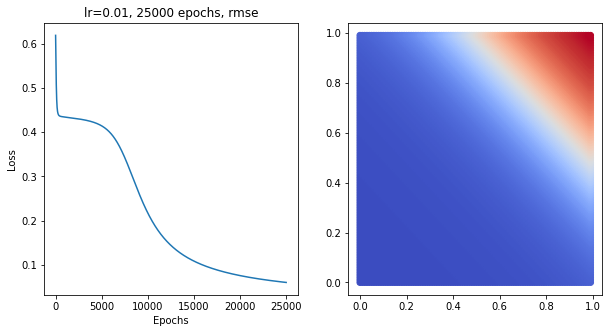

In [0]:
learning_rate = 0.01
NN_and = NeuralNetwork(x1, y_and, learning_rate)

NN_and.add_layer(1, sigmoids) # hidden layer
NN_and.add_layer(1, sigmoids) # output layer

epochs = 25000
# epochs = 2

history_and = train(NN_and, epochs)
plot_results(NN_and, history_and, "class")

##### 1.5.4 Print weights and biases

In [0]:
show_weights_bias(NN_and)

weights 1:
 [[3.38465815]
 [3.38466429]]
bias 1:
 [-4.96486409]
weights 2:
 [[7.49379477]]
bias 2:
 [-3.99251315]


##### XOR


   Layer  Hidden nodes Activation function
0      1             2             sigmoid
1      2             1             sigmoid


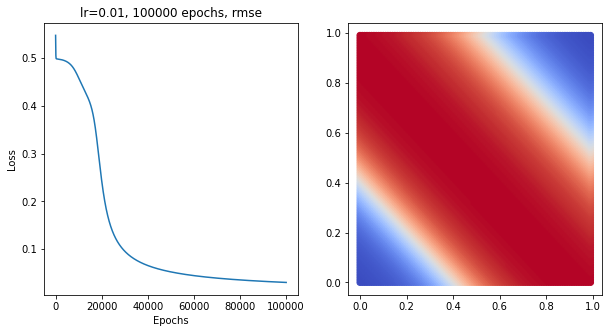

In [0]:
learning_rate = 0.01

NN_xor = NeuralNetwork(x1, y_xor, learning_rate)

NN_xor.add_layer(2, sigmoids) # hidden layer
NN_xor.add_layer(1, sigmoids) # output layer

epochs_xor = 100000

history_xor = train(NN_xor, epochs_xor)
plot_results(NN_xor, history_xor, "class")

##### Expected Decision Boundaries

**Model with 8 hidden nodes**

![alt text](https://i.imgur.com/07ekfU8.png)

**Model with 2 hidden nodes**

![alt text](https://i.imgur.com/LdRJWyC.png)

#### 1.6 Classification: Notes

* Perform from steps **1.5.1 to 1.5.5 for each of AND logic and XOR logic** separately
* You may additional text or code cells to note down the outcomes as appropriate
* Add a text cell to highlight your observations and inference



#### 1.7: Regression Test

Setup data for a Sinusoidal function and Gaussian function. For example,

```
x = np.arange(-1,1,0.01).reshape(-1,1)
y = np.sin(np.pi*x)
```

HINT: When the output values are negative sigmoid activation at the output may not work. You may need to consider alternatives such as linear or tanh. If you find this difficult to implement you may consider only the positive cycle range for sine.

Also note that when training entire batch of input (for eg. 200 samples) may lead to overflow. You may need to modify the code for sequential learning or mini-batch learning.

Repeat the steps from 1.5.1 to 1.5.4 and record your outcomes. For visualizing the outcome **(do not use 1.5.5)** instead run the following code.

In [0]:
x_sin = np.arange(-1,1,0.01).reshape(-1,1)
y_sin = np.sin(np.pi*x_sin)

NN_sin = NeuralNetwork(x_sin, y_sin, 0.01)

NN_sin.add_layer(10, tanhs) # hidden layer
NN_sin.add_layer(1, tanhs) # output layer

epochs_sin = 500

history_sin = train(NN_sin, epochs_sin)

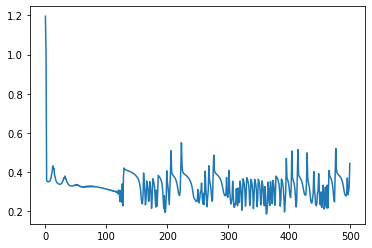

In [0]:
plt.plot(history_sin["loss"])

##### 1.7.5: Observe outcomes

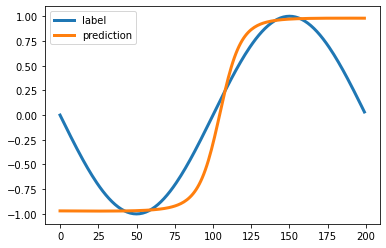

In [0]:
plt.plot(y_sin, linewidth=3)
plt.plot(NN_sin.predict(x_sin), linewidth=3)
plt.legend(['label', 'prediction'])

##### Expected plot

![Sine fit](https://i.imgur.com/zp9jsmL.png)

#### 1.8 Regrerssion: Notes

Using the steps illustrated for Problem 2 (except observing outcomes) test the ability of your neural network to perform regression task. What are your observations. How are some of the ways that the model can be improved?

### Phase 2: Integrate additional functionalities to the Neural Network model

The base class implementation of Neural Network provided is elementary and there are several features that can be improved. Implement any 3 of the following possible improvements (You are welcome to try all 5)

1. Introduce regularization of model parameters (weights and bias)
2. Enable mini-batch/ sequential learning where the number of items in a batch can be customized.
3. Implement one more hidden layer
4. Introduce ReLU activation. Implement Cross Entropy loss function.
5. Enable one or more of the following: Learning rate decay, early-stopping, Custom weights and bias initializer (eg. zeros, ones, Gaussian, etc)

HINTS:

* For 1, a regularization parameter will be required which can be set under __init__
* For 2, Batch learning can be introduced while training the model using a nested for loop approach. This does not require modification of the original class
* For 3, you will have to backpropagate loss through one more layer, which is like a chain operation
* For 4 and 5, you need to implement both the actual function (for feed-forward) and its derivate (for backpropagation)





*The original Neural Network class is modified above for the implementations of the additional functionalities in this phase.*

#### 2.1 Regularization with dropouts

Dropouts is implemented here by introducing a an intermediate dropout "layer". This dropout layer has the effect of passing the outputs from the previous layer onto the next layer if the respective node from the previous layer is not selected to be dropped-out. Otherwise, nothing is passed on.

**Train vs Test**

Nodes in this dropout layer has the specified probability of dropping out during training time.

Nodes are not dropped out during test time, giving the effect of an ensemble.

**Scaling**

Given a node $\alpha$ with a dropout probability of $p$ during training, as $\alpha$ will not be dropped during testing, the expected output of $\alpha$ during training will be $(1-p)$ times the expected output of $\alpha$ during testing.

Hence, we will have to scale the outputs of the dropout layer such that both the output values during testing will be the same as the output values that the model was trained on.

**Scaling during training or testing?**

We can do this be changing the output of $\alpha$ during testing by $(1-p)$. However, in a neural network, we want to make testing as fast as possible, hence a better way would be to scale the output of $\alpha$ by $\frac{1}{(1-p)}$ during training.


   Layer  Hidden nodes Activation function
0      1             6             sigmoid
1      2             6             dropout
2      3             1             sigmoid


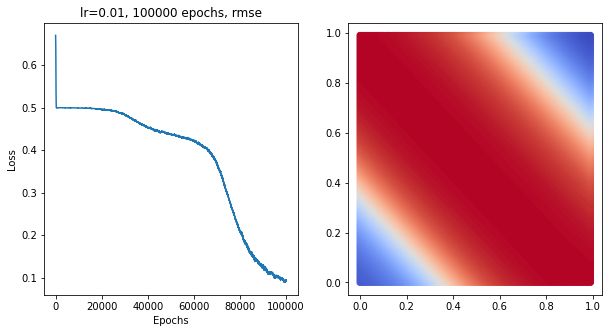

In [499]:
learning_rate = 0.01

NN_xor_1 = NeuralNetwork(x1, y_xor, learning_rate)

NN_xor_1.add_layer(6, sigmoids) # hidden layer
NN_xor_1.add_dropout(0.2) # nodes will have a 0.2 probability to "dropout"
NN_xor_1.add_layer(1, sigmoids) # output layer

history_xor1 = train(NN_xor_1, epochs_xor)
plot_results(NN_xor_1, history_xor1, "class")

As can be seen above, the introduction of dropouts prevented the model from fitting too nicely to the training data, resulting in some fuzzing in the loss plot; it's not as smooth as compared to the plots without dropouts.

We shall further inspect the model's attributes to check if dropout has been implemented as intended.

##### Inspection of dropout attributes
**Check if dropout is implemented as intended**

After training the model, the dropout "layer"'s weights is expected to remain unchanged as an identity matrix, and its bias is expected to remain unchanged as zeros.

The output of the dropout layer, ```layer 2``` in our case, is expected to be $o_{i} = \frac{o_{i-1}}{p}$ with the inclusion of some random zeros (appearing with the probability of the dropout specified) after training, and with no zeros, $o_i = o_{i-1}$ after predicting.

In [500]:
NN_xor_1.get_weights(2)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [501]:
NN_xor_1.get_bias(2)

array([0., 0., 0., 0., 0., 0.])

In [506]:
# Generating layer outputs after train
NN_xor_1.train(np.array([[1,1]]), np.array([[0]]))
print("Outputs after training, expected scaling and zeros\n")
pp.pprint(NN_xor_1.layer_outputs)

# Generating layer outputs after Test
NN_xor_1.predict(np.array([[1,1]]))
print("\nOutputs after testing, expected layer 2 = layer 1\n")
pp.pprint(NN_xor_1.layer_outputs)

Outputs after training, expected scaling and zeros

{0: array([[1., 1.]], dtype=float32),
 1: array([[0.77481516, 0.99998733, 0.66437328, 0.60525717, 0.99980749,
        0.8942211 ]]),
 2: array([[0.96851896, 0.        , 0.8304666 , 0.        , 1.24975936,
        0.        ]]),
 3: array([[0.87000743]]),
 4: array([[0]])}

Outputs after testing, expected layer 2 = layer 1

{0: array([[1., 1.]], dtype=float32),
 1: array([[0.7748192 , 0.99998733, 0.66436338, 0.60526618, 0.99980749,
        0.89459991]]),
 2: array([[0.7748192 , 0.99998733, 0.66436338, 0.60526618, 0.99980749,
        0.89459991]]),
 3: array([[0.10806838]]),
 4: array([[0]])}


#### 2.2. Enable customizable mini-batch
Dataset: sin dataset

In [0]:
learning_rate = 0.01
minibatch_size = 100

NN_sin_2 = NeuralNetwork(x_sin, y_sin, learning_rate, minibatch = minibatch_size)

NN_sin_2.add_layer(10, tanhs) # hidden layer
NN_sin_2.add_layer(1, tanhs) # output layer

In [0]:
y_sin.shape

(200, 1)

##### Training

In [0]:
history_sin_2 = train(NN_sin_2, epochs_sin)

# #tqdm generates a progress bar
# for i in tqdm(range(epochs_sin)): # epochs_sin is defined in section 1.7, to standardise for comparision purposes
#     # Collecting history
#     history_sin_2["loss"].append(NN_sin_2.evaluate(x_sin, y_sin)) # note that NN.x and NN.y will change with each train() call  
#     history_sin_2["weights"].append(NN_sin_2.get_weights(-1))
#     history_sin_2["bias"].append(NN_sin_2.get_bias(-1))

#     # Randomise minibatch data every epoch
#     X_train, y_train = shuffle(x_sin, y_sin) # note that NN.x and NN.y will change with each train() call  

#     for i in range(0, X_train.shape[0], minibatch_size):
#         # Get minibatch for training
#         X_train_mini = X_train[i:i + minibatch_size]
#         y_train_mini = y_train[i:i + minibatch_size]

#         NN_sin_2.train(X_train_mini, y_train_mini)

   Layer  Hidden nodes Activation function
0      1            10                tanh
1      2             1                tanh


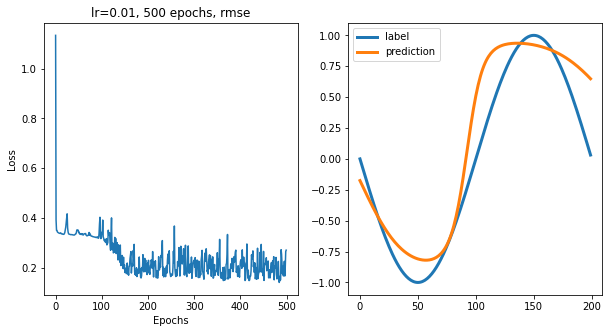

In [0]:
plot_results(NN_sin_2, history_sin_2, "reg")

##### Evaluation

In [0]:
print("Baseline model loss after", epochs_sin, "eopchs:", NN_sin.evaluate(x_sin, y_sin))
print("With minibatch model loss after", epochs_sin, "eopchs:", NN_sin_2.evaluate(x_sin, y_sin))

Baseline model loss after 500 eopchs: 0.3544223775237004
With minibatch model loss after 500 eopchs: 0.24582659587145206


#### 2.3. Implement one more hidden layer
Dataset: XOR


   Layer  Hidden nodes Activation function
0      1             2             sigmoid
1      2             2             sigmoid
2      3             1             sigmoid


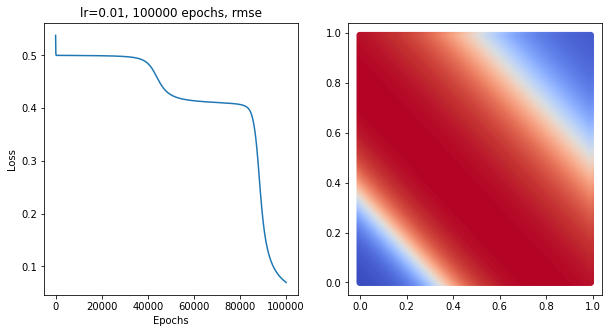

In [0]:
learning_rate = 0.01

NN_xor_3 = NeuralNetwork(x1, y_xor, learning_rate)

NN_xor_3.add_layer(2, sigmoids) # hidden layer
NN_xor_3.add_layer(2, sigmoids) # additional hidden layer
NN_xor_3.add_layer(1, sigmoids) # output layer

history_xor_3 = train(NN_xor_3, epochs_xor)  # epochs_xor is defined in section 1.5, to standardise for comparision purposes
plot_results(NN_xor_3, history_xor_3, "class")

#### 2.4 Introduce ReLU activation. Implement Cross Entropy loss function.
Dataset: XOR

In [0]:
epochs_xor

100000

Comments: As compared to a model using sigmoid, relu required a higher learning rate of 0.1 (up from 0.01), and more epochs to converge. This could be due to the presence of more local minima that "traps" the weights in a relu function.


   Layer  Hidden nodes Activation function
0      1             3                relu
1      2             1             sigmoid


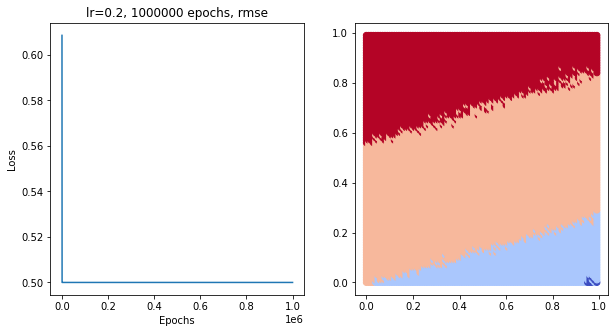

In [0]:
learning_rate = 0.1

NN_xor_4 = NeuralNetwork(x1, y_xor, learning_rate)

NN_xor_4.add_layer(3, relus) # hidden layer, changed to relu
NN_xor_4.add_layer(1, sigmoids) # output layer

history_xor_4 = train(NN_xor_4, 1000000)  # epochs_xor is defined in section 1.5, to standardise for comparision purposes
plot_results(NN_xor_4, history_xor_4, "class")

In [0]:
NN_xor_4.predict(np.array([[0.5,0.5]]))

array([[0.5]])


   Layer  Hidden nodes Activation function
0      1             2                relu
1      2             1             sigmoid


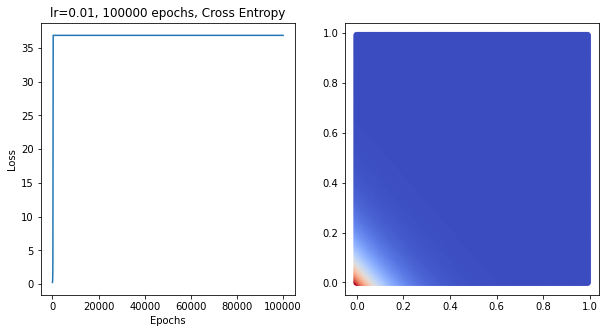

In [0]:
learning_rate = 0.01

NN_xor_4 = NeuralNetwork(x1, y_xor, learning_rate, lossfn = CE) # changed to cross entropy

NN_xor_4.add_layer(2, relus) # hidden layer, changed to relu
NN_xor_4.add_layer(1, sigmoids) # output layer

history_xor_4 = train(NN_xor_4, epochs_xor)  # epochs_xor is defined in section 1.5, to standardise for comparision purposes
plot_results(NN_xor_4, history_xor_4, "class")

#### 2.5 Momentum Optimizer for learning rate decay

Momentum in it's most basic form just means to reuse a part of the last update as a general direction to go to:

$$
\text{update}_{k+1} = \beta \cdot \text{update}_k + \nabla f(\Theta_{k})\\ 
\Theta_{k+1} = \Theta_k + \alpha \cdot \text{update}_{k+1}
$$

where $\beta$ is a parameter for the momentum and $\alpha$ is the normal learning rate.

### Phase 2: Notes

* All changes to the model can be tested using any one of the datasets used for classification test *(Problem 1)*, regression test *(Problem 2)*, or breast cancer dataset *(Problem 4)*
* Any code snippet that is modified should be written separately in code cells above.
* All modification and their impact on model performance must be described in detail in text cells below. Feel free to add images, mathematical equations, flowcharts, comparison scores, etc.
* Add as many number of text or code cells as required
* Note that sometimes it is easy to copy the outcomes from a previous cell execution in the form of an image (example, right click -> save image or screenshot), and embed the image in a text cell to describe the outcome.



### Phase 3: Classify cancerous cells using Wisconsin Breast Cancer Dataset

It is important to evaluate your Neural Network implementation on real-life dataset in order to measure performance, and identify scope for improvements. In this problem you will test the best variant of your model on the breast cancer dataset. More information about the data can be found [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).



#### 3.1 Load Data

Please note that the data loaded may not be normalized. Implement a data noramalization function and process the data through the normalizer before using it for training.

The dataset consists of 569 samples and 30 features. There are two classes identifying the cancer as bening or malign.

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE

In [0]:
# DO NOT MODIFY this cell

bc = load_breast_cancer() # added this line
data = bc.data
target = bc.target

test_idx = np.array([  9,  10,  12,  15,  16,  20,  22,  25,  38,  47,  57,  61,  68,
        73,  74,  84,  85,  91,  93, 108, 112, 117, 119, 135, 136, 138,
       140, 147, 149, 152, 171, 172, 173, 180, 182, 186, 187, 205, 207,
       210, 218, 235, 239, 242, 251, 267, 270, 275, 283, 285, 286, 288,
       291, 305, 307, 310, 315, 318, 319, 323, 337, 339, 346, 350, 352,
       368, 370, 374, 378, 389, 402, 408, 414, 415, 419, 422, 428, 430,
       433, 435, 442, 451, 458, 459, 464, 465, 469, 470, 480, 484, 486,
       501, 510, 532, 533, 536, 537, 543, 553, 560])

train_idx = list(set(test_idx)^set(np.arange(len(data))))

data_train = data[train_idx]
target_train = target[train_idx]

data_test = data[test_idx]
target_test= target[test_idx]

In [0]:
target_name = 'Benign'

##### 3.1.1 Data Pre-processing

In [675]:
df_train = pd.DataFrame(data= np.c_[data_train, target_train], columns= np.append(bc.feature_names, target_name))
df_test = pd.DataFrame(data= np.c_[data_test, target_test], columns= np.append(bc.feature_names, target_name))

df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [676]:
print("Train dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)

Train dataset shape: (469, 31)
Test dataset shape: (100, 31)


In [677]:
df_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,14.062337,19.182537,91.529723,649.064819,0.096417,0.103772,0.086378,0.048011,0.180319,0.062844,0.401388,1.203633,2.835842,39.890821,0.007099,0.025040,0.030527,0.011457,0.020345,0.003752,16.184819,25.531130,106.678785,871.435394,0.132839,0.252047,0.266931,0.112910,0.288232,0.083808,0.643923
std,3.508934,4.333695,24.211038,348.155085,0.014102,0.052241,0.076591,0.038137,0.026366,0.006913,0.278620,0.547473,2.027113,46.594402,0.003080,0.017235,0.022938,0.005569,0.008149,0.002414,4.792903,6.224408,33.345002,559.100094,0.022792,0.153892,0.198969,0.065136,0.060187,0.017149,0.479350
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,0.000000
25%,11.600000,15.910000,74.650000,412.600000,0.086620,0.065450,0.029560,0.020310,0.162000,0.057690,0.231000,0.828200,1.596000,17.670000,0.005158,0.013080,0.014820,0.007584,0.015160,0.002267,12.980000,20.980000,83.850000,512.500000,0.117000,0.147200,0.114400,0.063840,0.250000,0.072070,0.000000
50%,13.210000,18.820000,85.480000,538.900000,0.095940,0.092420,0.059990,0.032640,0.178800,0.061830,0.323700,1.078000,2.276000,24.280000,0.006399,0.020420,0.026110,0.010780,0.018700,0.003237,14.830000,25.160000,96.740000,674.700000,0.131600,0.211600,0.224100,0.097490,0.280600,0.080040,1.000000
75%,15.850000,21.720000,104.700000,788.500000,0.105300,0.129200,0.120400,0.069870,0.194500,0.066080,0.483400,1.440000,3.330000,44.740000,0.008328,0.032070,0.041670,0.014500,0.022790,0.004560,18.510000,29.410000,124.900000,1050.000000,0.146300,0.329900,0.379100,0.159500,0.315100,0.091660,1.000000
max,28.110000,33.810000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.153500,0.039270,0.078950,0.022860,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.170000,0.290300,0.663800,0.173000,1.000000


In [0]:
# sns.pairplot(df_train, hue=target_name)

##### Normalization

In [0]:
# Implement code for data normalization. Remember you need to use normalization 
# parameters from training data and apply the same for test data. Eg. maximum 
# and minimum values.

def normalize(data, tr_min, tr_max):
    '''min-max scaler'''
    return (data - tr_min) / (tr_max - tr_min)


df_train_scaled = normalize(df_train, df_train.min(), df_train.max())
df_test_scaled = normalize(df_test, df_train.min(), df_train.max())

In [680]:
df_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,0.335148,0.393051,0.329899,0.214450,0.395295,0.258856,0.202386,0.238625,0.402592,0.271355,0.104975,0.186402,0.097952,0.061802,0.183078,0.171149,0.198876,0.291755,0.155682,0.130081,0.293661,0.360105,0.280237,0.168658,0.407243,0.246820,0.228146,0.388944,0.259527,0.242789,0.643923
std,0.166072,0.179821,0.167307,0.147680,0.127307,0.160238,0.179454,0.189548,0.142826,0.145605,0.100894,0.120994,0.095515,0.087028,0.104716,0.129439,0.149434,0.141808,0.117400,0.109910,0.170505,0.165896,0.166069,0.137412,0.150513,0.168998,0.170059,0.224376,0.118665,0.145594,0.479350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218609,0.257261,0.213254,0.114146,0.306852,0.141310,0.069260,0.100944,0.303359,0.162805,0.043274,0.103430,0.039533,0.020299,0.117109,0.081323,0.096547,0.193125,0.080981,0.062472,0.179651,0.238806,0.166542,0.080441,0.302648,0.131681,0.097778,0.219910,0.184148,0.143136,0.000000
50%,0.294808,0.378008,0.288093,0.167720,0.390990,0.224035,0.140558,0.162227,0.394366,0.250000,0.076842,0.158637,0.071573,0.032645,0.159296,0.136450,0.170098,0.274510,0.131982,0.106632,0.245464,0.350213,0.230739,0.120306,0.399062,0.202403,0.191538,0.335825,0.244479,0.210799,1.000000
75%,0.419755,0.498340,0.420911,0.273595,0.475490,0.336850,0.282099,0.347266,0.479415,0.339511,0.134673,0.238640,0.121236,0.070859,0.224870,0.223946,0.271466,0.369239,0.190906,0.166864,0.376379,0.463486,0.370985,0.212544,0.496137,0.332316,0.324017,0.549432,0.312500,0.309449,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Rebalance Dataset

In [0]:
g = df_train_scaled.groupby(target_name)

In [0]:
df_train_balanced = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

In [683]:
df_train_balanced.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.00000
mean,0.373297,0.407584,0.369198,0.247180,0.410789,0.292671,0.245410,0.287746,0.422099,0.269904,0.122462,0.185836,0.113798,0.076351,0.181654,0.186830,0.219175,0.315729,0.152022,0.133503,0.335611,0.378138,0.321303,0.200492,0.427578,0.281960,0.267489,0.449443,0.274302,0.258321,0.50000
std,0.174745,0.175319,0.176151,0.159710,0.122588,0.167919,0.191442,0.200253,0.143229,0.142739,0.112257,0.111478,0.106685,0.099085,0.103616,0.132418,0.152367,0.141152,0.121578,0.102298,0.180648,0.165345,0.175938,0.149467,0.151956,0.179289,0.177240,0.229112,0.128457,0.152539,0.50075
min,0.033603,0.027801,0.031442,0.011410,0.118534,0.039077,0.000000,0.000000,0.057963,0.000000,0.000000,0.008376,0.000679,0.000796,0.032430,0.011221,0.000000,0.000000,0.005878,0.002522,0.026610,0.012527,0.020320,0.009438,0.090273,0.020755,0.000000,0.000000,0.007295,0.000340,0.00000
25%,0.240144,0.283817,0.234106,0.128791,0.325743,0.174038,0.085520,0.119110,0.329496,0.163227,0.050299,0.109762,0.048214,0.023357,0.116472,0.092795,0.111857,0.219500,0.077092,0.067229,0.193970,0.260928,0.180624,0.089891,0.327247,0.159410,0.126474,0.273372,0.193908,0.152942,0.00000
50%,0.332197,0.398133,0.328485,0.196352,0.407737,0.268603,0.214527,0.261854,0.411159,0.250527,0.086819,0.158526,0.084107,0.043767,0.160298,0.156165,0.187980,0.299720,0.127804,0.113234,0.294379,0.367804,0.278351,0.152404,0.433071,0.236885,0.243376,0.437823,0.252366,0.224552,0.50000
75%,0.500805,0.508402,0.492606,0.346999,0.484517,0.387154,0.357134,0.428516,0.494312,0.340038,0.164449,0.235436,0.146445,0.100646,0.223952,0.235813,0.291759,0.394894,0.185648,0.169163,0.461757,0.489539,0.450172,0.279087,0.520571,0.377835,0.368953,0.632191,0.325907,0.317302,1.00000
max,1.000000,0.989627,1.000000,1.000000,0.831182,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.726397,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


##### Final Dataset used for training

In [0]:
# train = df_train_scaled
train = df_train_balanced
test = df_test_scaled

data_train_final = train.loc[:, train.columns != target_name].to_numpy()
target_train_final = train.loc[:, test.columns == target_name].to_numpy()

data_test_final = test.loc[:, test.columns != target_name].to_numpy()
target_test_final = test.loc[:, test.columns == target_name].to_numpy()

In [685]:
print(data_train_final.shape)
print(target_train_final.shape)
print(data_test_final.shape)
print(target_test_final.shape)

(334, 30)
(334, 1)
(100, 30)
(100, 1)


#### 3.2 Training and Prediction

#### Base Model

In [0]:
# Building the neural network
# NN = NeuralNetwork(data_train_final, target_train_final, 16, 0.01)

# Define Hyperparameters
lr = 0.01
minibatch = 50

# Function to create new NN with specified architecture
def create_NN(lr,minibatch):
    NN = NeuralNetwork(data_train_final, target_train_final, lr, minibatch=minibatch)
    NN.add_layer(8, sigmoids) # hidden layer
    NN.add_dropout(0.2)
    NN.add_layer(1, sigmoids) # output layer
    return NN

# set seed for reproducibility
np.random.seed(1234)
NN = create_NN(lr,minibatch)

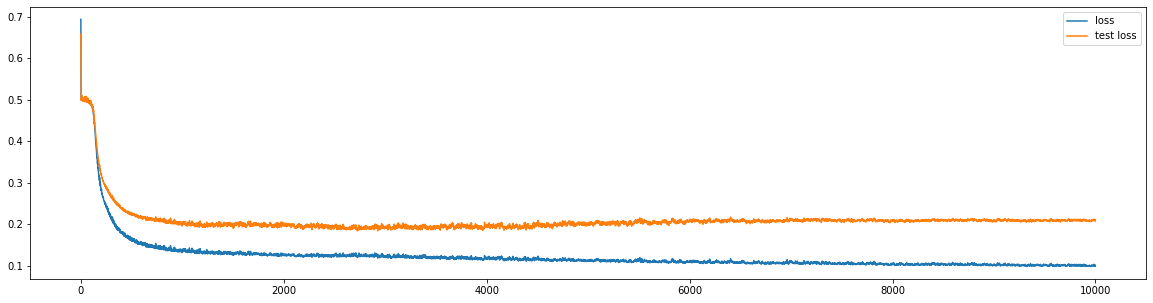

In [713]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []
history = {"loss": [], "weights": [], "bias": [], "test loss": []}
epochs = 10000 # trains the NN 1,000 times

for i in tqdm(range(epochs)):
    history["test loss"].append(NN.evaluate(data_test_final, target_test_final))
    history["loss"].append(NN.evaluate(data_train_final, target_train_final))
    # history["weights"].append(NN.get_weights(-1))
    # history["bias"].append(NN.get_bias(-1))
    NN.train(data_train_final, target_train_final)

# history = train(NN, epochs) #todo: why doesnt this work? TypeError: 'DataFrame' object is not callable

f = plt.figure(figsize=(20,5))
plt.plot(history["loss"])
plt.plot(history["test loss"])
plt.legend(['loss', 'test loss'])

In [714]:
min_test_loss = min(history["test loss"])
print(min_test_loss)

0.18370749200603156


##### Results

In [689]:
y_pred = NN.predict(data_test_final) # y_pred of test

# Selecting threshold to optimise for accuracy
max_accuracy = 0
optimum_threshold = 0
for threshold in np.arange(0,1,0.01):
    y_pred_class = np.where(y_pred>=threshold, 1, 0)
    accuracy = accuracy_score(target_test_final, y_pred_class)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimum_threshold = threshold

print("Optimum threshold selected =", optimum_threshold)
print("Max accuracy =", max_accuracy)

y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0) # can change original threshold of 0.5

# # Colour plot
# X_embedded = TSNE(n_components=2).fit_transform(data_test_final)
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

# Scores
print(classification_report(target_test_final, y_pred_class))

Optimum threshold selected = 0.01
Max accuracy = 0.96
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        45
         1.0       0.95      0.98      0.96        55

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



#### Training on test

todo: early stopping based on test accuracy

In [0]:
# Building the neural network
# set seed for reproducibility
np.random.seed(1234)
NN_test = NeuralNetwork(data_test_final, target_test_final, lr, minibatch=minibatch)
NN_test.add_layer(8, sigmoids) # hidden layer
NN_test.add_dropout(0.2)
NN_test.add_layer(1, sigmoids) # output layer

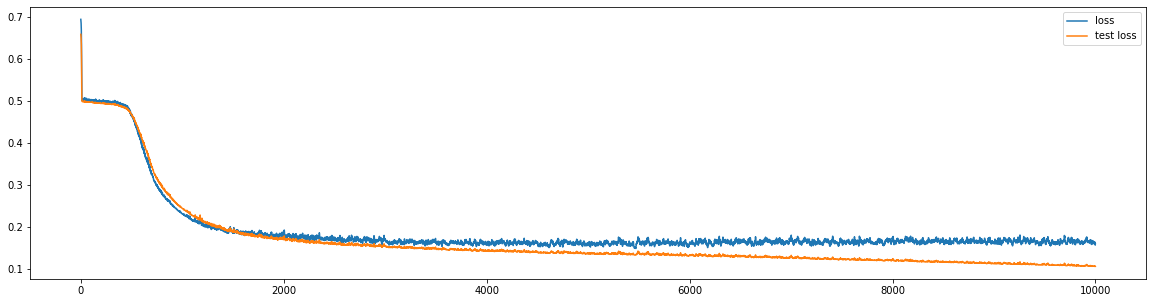

In [705]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []
history_test = {"loss": [], "weights": [], "bias": [], "test loss": []}
epochs = 10000 # trains the NN 1,000 times

for i in tqdm(range(epochs)):
    history_test["test loss"].append(NN_test.evaluate(data_test_final, target_test_final))
    history_test["loss"].append(NN_test.evaluate(data_train_final, target_train_final))
    NN_test.train(data_test_final, target_test_final)

f = plt.figure(figsize=(20,5))
plt.plot(history_test["loss"])
plt.plot(history_test["test loss"])
plt.legend(['loss', 'test loss'])

In [718]:
print(min(history_test["test loss"]))
min_loss = min(history_test["loss"])
print(min_loss)

0.10645668610737938
0.14918960803426617


In [707]:
y_pred = NN_test.predict(data_test_final) # y_pred of train

# Selecting threshold to optimise for accuracy
max_accuracy = 0
optimum_threshold = 0
for threshold in np.arange(0,1,0.01):
    y_pred_class = np.where(y_pred>=threshold, 1, 0)
    accuracy = accuracy_score(target_test_final, y_pred_class)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimum_threshold = threshold

print("Optimum threshold selected =", optimum_threshold)
print("Max accuracy =", max_accuracy)

y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0) # can change original threshold of 0.5

# # Colour plot
# X_embedded = TSNE(n_components=2).fit_transform(data_test_final)
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

# Scores
print(classification_report(target_test_final, y_pred_class))

Optimum threshold selected = 0.54
Max accuracy = 0.99
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        45
         1.0       1.00      0.98      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [710]:
y_pred = NN_test.predict(data_train_final) # y_pred of train
y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0) # can change original threshold of 0.5
print(classification_report(target_train_final, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       167
         1.0       0.98      0.95      0.96       167

    accuracy                           0.96       334
   macro avg       0.96      0.96      0.96       334
weighted avg       0.96      0.96      0.96       334



#### Test early stopping

In [0]:
# set seed for reproducibility
np.random.seed(1234)
NN_test = NeuralNetwork(data_test_final, target_test_final, lr, minibatch=minibatch)
NN_test.add_layer(8, sigmoids) # hidden layer
NN_test.add_dropout(0.2)
NN_test.add_layer(8, sigmoids) # hidden layer
NN_test.add_dropout(0.2)
NN_test.add_layer(1, sigmoids) # output layer

Early stopped at eopch 3284



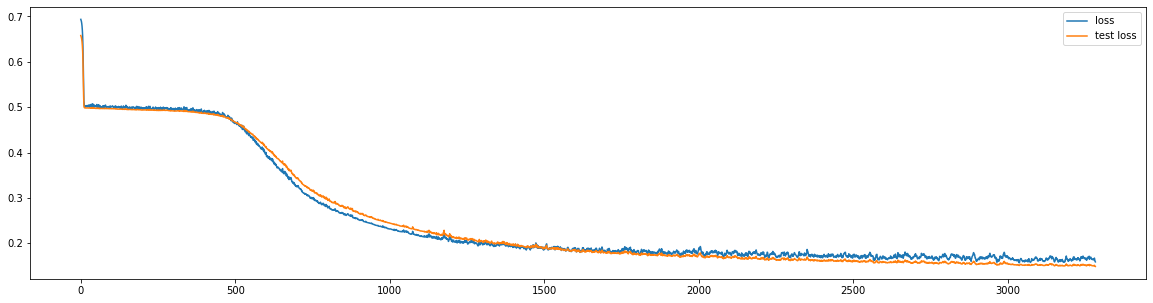

In [720]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []
history_test = {"loss": [], "weights": [], "bias": [], "test loss": []}

for i in tqdm(range(epochs)):
    history_test["test loss"].append(NN_test.evaluate(data_test_final, target_test_final))
    history_test["loss"].append(NN_test.evaluate(data_train_final, target_train_final))

    # Early stopping
    if history_test["test loss"][-1] <= min_loss:
        print("Early stopped at eopch", i)
        break
    NN_test.train(data_test_final, target_test_final)

f = plt.figure(figsize=(20,5))
plt.plot(history_test["loss"])
plt.plot(history_test["test loss"])
plt.legend(['loss', 'test loss'])

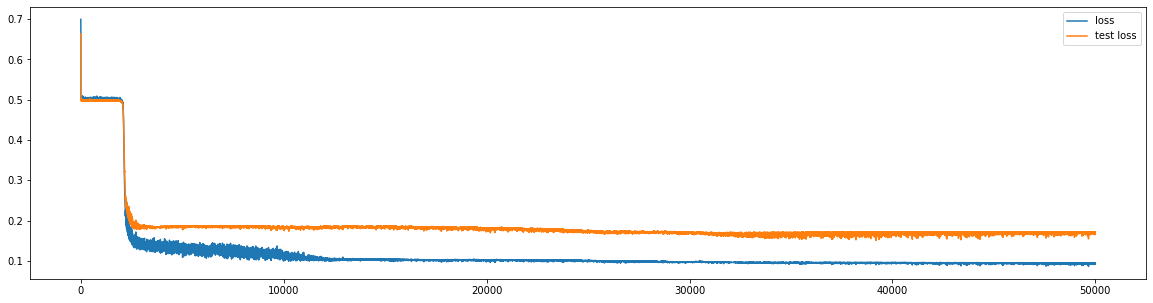

In [734]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []
history_test1 = {"loss": [], "weights": [], "bias": [], "test loss": []}

for i in tqdm(range(5*epochs)):
    history_test1["test loss"].append(NN_test.evaluate(data_test_final, target_test_final))
    history_test1["loss"].append(NN_test.evaluate(data_train_final, target_train_final))

    # Early stopping
    # if history_test1["test loss"][-1] <= min_loss:
    #     print("Early stopped at eopch", i)
    #     break
    NN_test.train(data_train_final, target_train_final)
    NN_test.train(data_test_final, target_test_final)

f = plt.figure(figsize=(20,5))
plt.plot(history_test1["loss"])
plt.plot(history_test1["test loss"])
plt.legend(['loss', 'test loss'])

In [758]:
print(min(history_test1["test loss"]))
print(min(history_test1["loss"]))

0.15064681932705842
0.08589289161816027


In [735]:
y_pred = NN_test.predict(data_test_final) # y_pred of train

# Selecting threshold to optimise for accuracy
max_accuracy = 0
optimum_threshold = 0
for threshold in np.arange(0,1,0.01):
    y_pred_class = np.where(y_pred>=threshold, 1, 0)
    accuracy = accuracy_score(target_test_final, y_pred_class)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimum_threshold = threshold

print("Optimum threshold selected =", optimum_threshold)
print("Max accuracy =", max_accuracy)

y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0) # can change original threshold of 0.5

# # Colour plot
# X_embedded = TSNE(n_components=2).fit_transform(data_test_final)
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

# Scores
print(classification_report(target_test_final, y_pred_class))

Optimum threshold selected = 0.01
Max accuracy = 0.98
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        45
         1.0       0.96      1.00      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [736]:
y_pred = NN_test.predict(data_train_final) # y_pred of train
y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0) # can change original threshold of 0.5
print(classification_report(target_train_final, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       167
         1.0       0.99      0.99      0.99       167

    accuracy                           0.99       334
   macro avg       0.99      0.99      0.99       334
weighted avg       0.99      0.99      0.99       334



#### Early stop based on accuracy

In [0]:
def find_accuracy(NN, x, y, threshold=0.5):
    y_pred = NN.predict(x) # y_pred of test
    y_pred_class = np.where(y_pred>=threshold, 1, 0)
    return accuracy_score(y, y_pred_class)

In [0]:
# set seed for reproducibility
np.random.seed(1234)
NN_test2 = NeuralNetwork(data_test_final, target_test_final, lr, minibatch=minibatch)
NN_test2.add_layer(8, sigmoids) # hidden layer
NN_test2.add_dropout(0.2)
NN_test2.add_layer(8, sigmoids) # hidden layer
NN_test2.add_dropout(0.2)
NN_test2.add_layer(1, sigmoids) # output layer

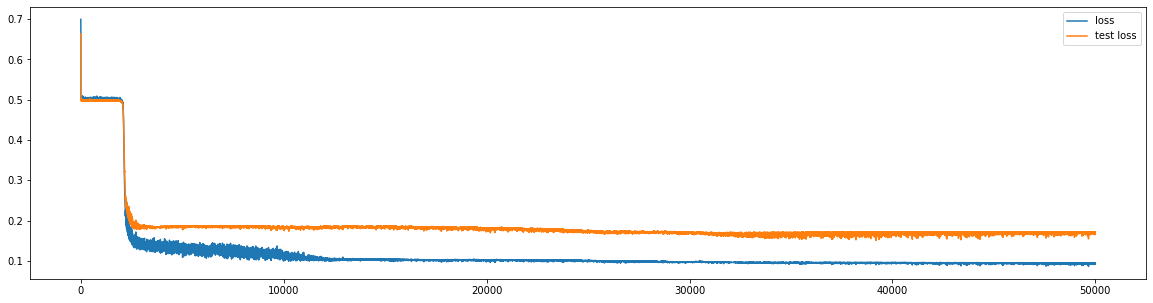

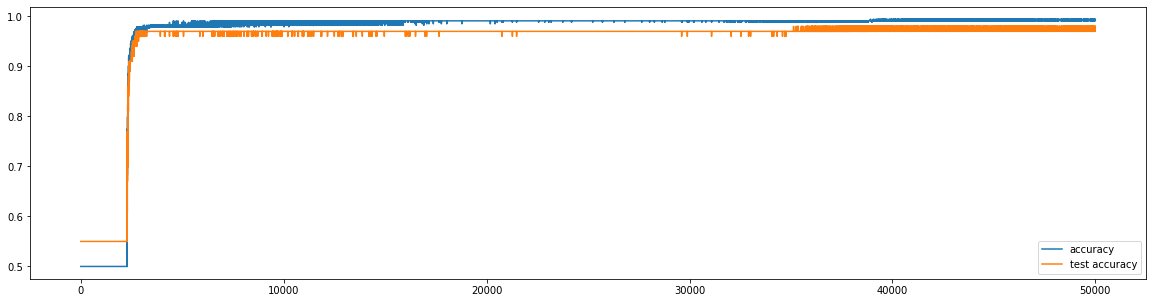

In [761]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []
history_test1 = {"loss": [], "weights": [], "bias": [], "test loss": [], "accuracy": [], "test accuracy": []}

for i in tqdm(range(5*epochs)):
    history_test1["test accuracy"].append(find_accuracy(NN_test2, data_test_final, target_test_final, optimum_threshold))
    history_test1["accuracy"].append(find_accuracy(NN_test2, data_train_final, target_train_final, optimum_threshold))
    history_test1["test loss"].append(NN_test2.evaluate(data_test_final, target_test_final))
    history_test1["loss"].append(NN_test2.evaluate(data_train_final, target_train_final))

    # Early stopping
    # if history_test1["test loss"][-1] <= min_loss:
    #     print("Early stopped at eopch", i)
    #     break
    NN_test2.train(data_train_final, target_train_final)
    NN_test2.train(data_test_final, target_test_final)

f = plt.figure(figsize=(20,5))
plt.plot(history_test1["loss"])
plt.plot(history_test1["test loss"])
plt.legend(['loss', 'test loss'])
plt.show()

f = plt.figure(figsize=(20,5))
plt.plot(history_test1["accuracy"])
plt.plot(history_test1["test accuracy"])
plt.legend(['accuracy', 'test accuracy'])
plt.show()

In [762]:
max_test_acc = max(history_test1["test accuracy"])
print("Max test accuracy:", max_test_acc)
print("Max train accuracy:", max(history_test1["accuracy"]))

Max test accuracy: 0.98
Max train accuracy: 0.9940119760479041


In [0]:
# set seed for reproducibility
np.random.seed(1234)
NN_test2 = NeuralNetwork(data_test_final, target_test_final, lr, minibatch=minibatch)
NN_test2.add_layer(8, sigmoids) # hidden layer
NN_test2.add_dropout(0.2)
NN_test2.add_layer(8, sigmoids) # hidden layer
NN_test2.add_dropout(0.2)
NN_test2.add_layer(1, sigmoids) # output layer

Early stopped at eopch 15126


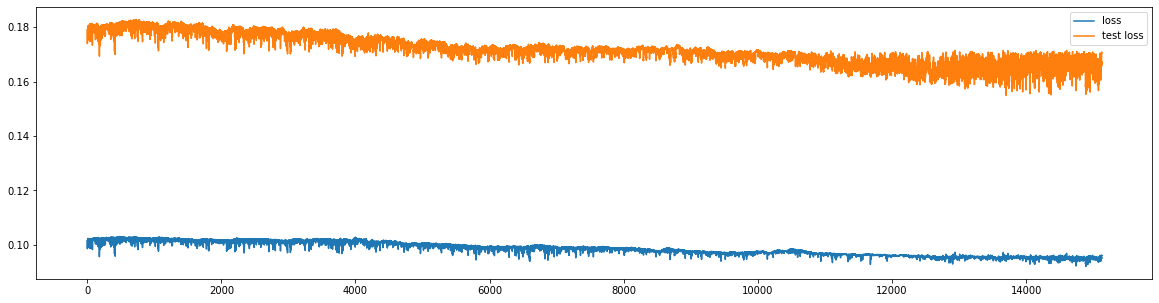

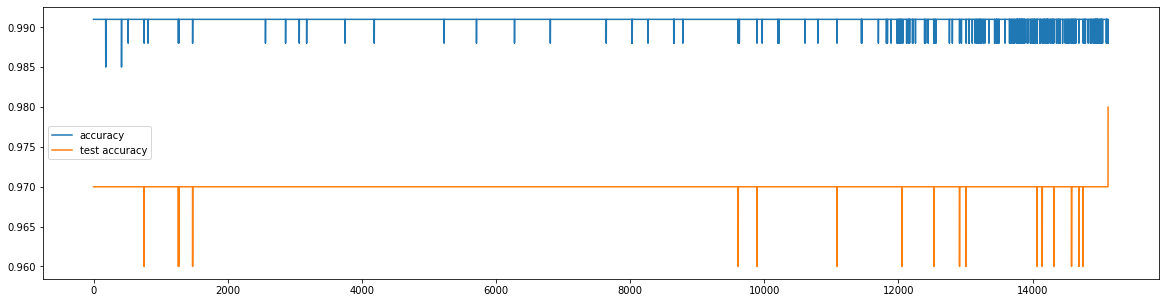

Max test accuracy: 0.98
Max train accuracy: 0.9910179640718563


In [773]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []
history_test1 = {"loss": [], "weights": [], "bias": [], "test loss": [], "accuracy": [], "test accuracy": []}

for i in tqdm(range(5*epochs)):
    history_test1["test accuracy"].append(find_accuracy(NN_test2, data_test_final, target_test_final, optimum_threshold))
    history_test1["accuracy"].append(find_accuracy(NN_test2, data_train_final, target_train_final, optimum_threshold))
    history_test1["test loss"].append(NN_test2.evaluate(data_test_final, target_test_final))
    history_test1["loss"].append(NN_test2.evaluate(data_train_final, target_train_final))

    # Early stopping
    if history_test1["test accuracy"][-1] >= max_test_acc:
        print("Early stopped at eopch", i)
        break
    NN_test2.train(data_train_final, target_train_final)
    NN_test2.train(data_test_final, target_test_final)

f = plt.figure(figsize=(20,5))
plt.plot(history_test1["loss"])
plt.plot(history_test1["test loss"])
plt.legend(['loss', 'test loss'])
plt.show()

f = plt.figure(figsize=(20,5))
plt.plot(history_test1["accuracy"])
plt.plot(history_test1["test accuracy"])
plt.legend(['accuracy', 'test accuracy'])
plt.show()

print("Max test accuracy:", max(history_test1["test accuracy"]))
print("Max train accuracy:", max(history_test1["accuracy"]))

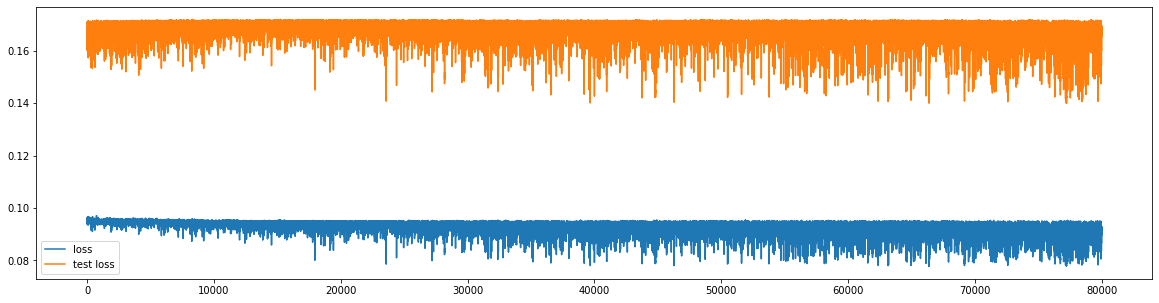

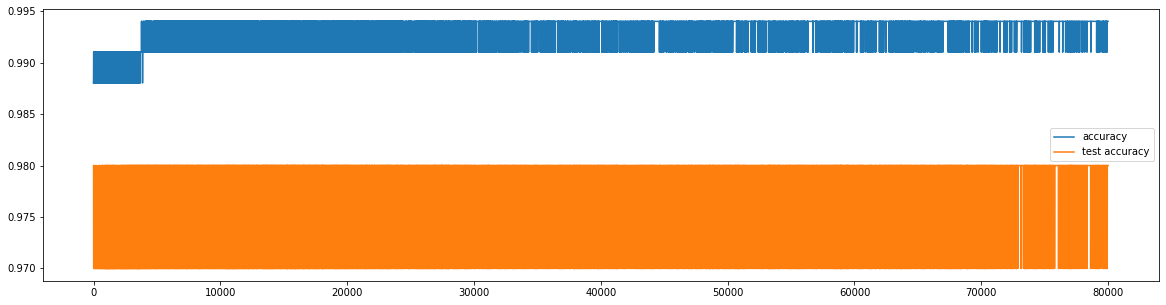

Max test accuracy: 0.98
Max train accuracy: 0.9940119760479041


In [774]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []
history_test1 = {"loss": [], "weights": [], "bias": [], "test loss": [], "accuracy": [], "test accuracy": []}

for i in tqdm(range(8*epochs)):
    history_test1["test accuracy"].append(find_accuracy(NN_test2, data_test_final, target_test_final, optimum_threshold))
    history_test1["accuracy"].append(find_accuracy(NN_test2, data_train_final, target_train_final, optimum_threshold))
    history_test1["test loss"].append(NN_test2.evaluate(data_test_final, target_test_final))
    history_test1["loss"].append(NN_test2.evaluate(data_train_final, target_train_final))

    # Early stopping
    # if history_test1["test accuracy"][-1] >= max_test_acc:
    #     print("Early stopped at eopch", i)
    #     break
    NN_test2.train(data_train_final, target_train_final)
    NN_test2.train(data_test_final, target_test_final)

f = plt.figure(figsize=(20,5))
plt.plot(history_test1["loss"])
plt.plot(history_test1["test loss"])
plt.legend(['loss', 'test loss'])
plt.show()

f = plt.figure(figsize=(20,5))
plt.plot(history_test1["accuracy"])
plt.plot(history_test1["test accuracy"])
plt.legend(['accuracy', 'test accuracy'])
plt.show()

print("Max test accuracy:", max(history_test1["test accuracy"]))
print("Max train accuracy:", max(history_test1["accuracy"]))

#### Improvement 1: early stopping

In [0]:
# set seed for reproducibility
np.random.seed(1234)

# Building a new neural network
NN = create_NN(lr,minibatch)

Early stopped at eopch 2727


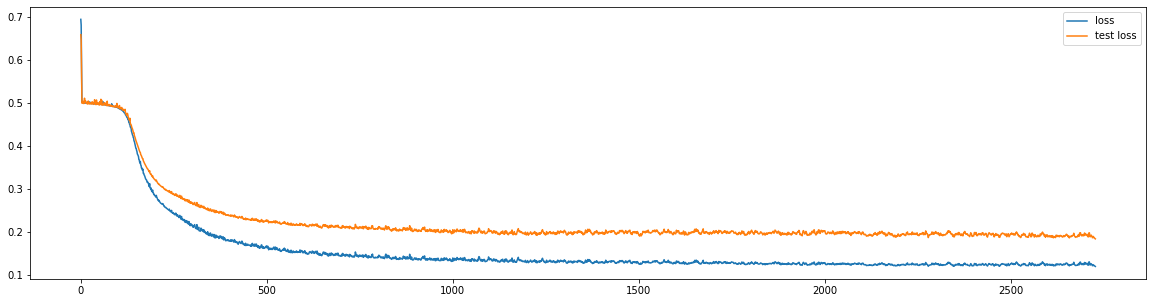

In [691]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []
history = {"loss": [], "weights": [], "bias": [], "test loss": []}

for i in tqdm(range(epochs)):
    history["test loss"].append(NN.evaluate(data_test_final, target_test_final))
    history["loss"].append(NN.evaluate(data_train_final, target_train_final))

    # Early stopping
    if history["test loss"][-1] <= min_test_loss:
        print("Early stopped at eopch", i)
        break

    # history["weights"].append(NN.get_weights(-1))
    # history["bias"].append(NN.get_bias(-1))
    NN.train(data_train_final, target_train_final)

f = plt.figure(figsize=(20,5))
plt.plot(history["loss"])
plt.plot(history["test loss"])
plt.legend(['loss', 'test loss'])

##### Results

In [692]:
y_pred = NN.predict(data_test_final) # y_pred of test

# Selecting threshold to optimise for accuracy
max_accuracy = 0
optimum_threshold = 0
for threshold in np.arange(0,1,0.01):
    y_pred_class = np.where(y_pred>=threshold, 1, 0)
    accuracy = accuracy_score(target_test_final, y_pred_class)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimum_threshold = threshold

print("Optimum threshold selected =", optimum_threshold)
print("Max accuracy =", max_accuracy)

y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0) # can change original threshold of 0.5

# # Colour plot
# X_embedded = TSNE(n_components=2).fit_transform(data_test_final)
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

# Scores
print(classification_report(target_test_final, y_pred_class))

Optimum threshold selected = 0.19
Max accuracy = 0.97
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        45
         1.0       0.95      1.00      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



#### Improvement 2: Hyparameters Grid Search
*Code commented out as it takes forever to run, outputs pasted below*


In [0]:
# overall_max_accuracy = 0
# optimum_lr = 0
# optimum_minibatch = 0
# optimum_threshold = 0
# optimum_found = False # flag to stop searching once accuracy hits 98%

# for lr in tqdm(np.arange(0.01,3,0.01)):
#     if optimum_found: break
#     for minibatch in np.arange(1,data_train_final.shape[0],50):
#         if optimum_found: break

#         ## Base model
#         # set seed for reproducibility
#         np.random.seed(1234)
#         NN = create_NN(lr,minibatch)

#         history = {"loss": [], "weights": [], "bias": [], "test loss": []}
#         epochs = 1500 # trains the NN 1,000 times

#         for i in range(epochs):
#             history["test loss"].append(NN.evaluate(data_test_final, target_test_final))
#             # history["loss"].append(NN.evaluate(data_train_final, target_train_final))
#             NN.train(data_train_final, target_train_final)
        
#         min_test_loss = min(history["test loss"])

#         ## Early stopping model
#         # set seed for reproducibility
#         np.random.seed(1234)

#         # Building a new neural network
#         NN = create_NN(lr,minibatch)

#         ## Training base model
#         # history = {"loss": [], "weights": [], "bias": [], "test loss": []}

#         for i in range(epochs):
#             test_loss = NN.evaluate(data_test_final, target_test_final)
#             # history["loss"].append(NN.evaluate(data_train_final, target_train_final))

#             # Early stopping
#             if test_loss <= min_test_loss:
#                 # print("Early stopped at eopch", i)
#                 break

#             NN.train(data_train_final, target_train_final)

#         ## Calculating accuracy
#         y_pred = NN.predict(data_test_final) # y_pred of test

#         # Selecting threshold to optimise for accuracy
#         local_max_accuracy = 0
#         for threshold in np.arange(0,1,0.01):
#             y_pred_class = np.where(y_pred>=threshold, 1, 0)
#             accuracy = accuracy_score(target_test_final, y_pred_class)
#             if accuracy > local_max_accuracy:
#                 local_max_accuracy = accuracy
#                 optimum_threshold = threshold
        
#         ## Updating optimum params
#         if local_max_accuracy > overall_max_accuracy:
#             overall_max_accuracy = local_max_accuracy
#             optimum_lr = lr
#             optimum_minibatch = minibatch
#             if overall_max_accuracy >= 0.98:
#                 optimum_found = True
#                 print("Optimum found")

# print("Optimum learning rate selected =", optimum_lr)
# print("Optimum minibatch selected =", optimum_minibatch)
# print("Optimum threshold selected =", optimum_threshold)
# print("Max accuracy =", max_accuracy)

![alt text](https://drive.google.com/uc?id=1myfL107KE1Ra7l7M_zo6qwnVoFLk2SnB)

#### Further Investigation

In [694]:
y_pred = NN.predict(data_test_final)
y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0)
y_pred_class.shape

(100, 1)

In [695]:
target_test_final.shape

(100, 1)

In [696]:
test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
0,0.259312,0.594606,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.525460,0.683867,0.067391,0.273780,0.060406,0.032010,0.184791,0.525115,0.504430,0.364655,0.120312,0.418171,0.254714,0.763859,0.235271,0.129326,0.753682,1.131890,0.944444,0.761281,0.552050,1.292894,0.0
1,0.427801,0.561411,0.407090,0.277540,0.265686,0.145114,0.077296,0.165159,0.253521,0.147641,0.097049,0.182726,0.080526,0.062959,0.078730,0.052701,0.071726,0.193303,0.072914,0.097755,0.400569,0.582623,0.365506,0.237122,0.309912,0.140356,0.124701,0.343610,0.272476,0.248833,0.0
2,0.576885,0.626141,0.612328,0.415483,0.404171,0.694497,0.483833,0.555666,0.724269,0.590564,0.305631,0.708937,0.485935,0.204330,0.048475,0.606228,0.579153,1.041508,0.508579,0.543824,0.463536,0.477612,0.504457,0.281852,0.214819,0.398645,0.311026,0.608681,0.317429,0.399779,0.0
3,0.357755,0.739834,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,0.673348,0.438290,0.093609,0.148692,0.099986,0.048091,0.132372,0.301529,0.308860,0.277566,0.130109,0.208111,0.339025,0.669243,0.367000,0.186296,0.638117,0.692294,0.600513,0.589735,0.522871,0.669751,0.0
4,0.364381,0.432365,0.352083,0.229480,0.415636,0.161401,0.173266,0.261382,0.284940,0.195029,0.130798,0.194440,0.114875,0.072092,0.136146,0.070358,0.130163,0.282404,0.065710,0.054186,0.396300,0.502665,0.363514,0.234172,0.496797,0.175498,0.249060,0.554254,0.288446,0.228797,0.0


In [0]:
test["pred_prob"] = y_pred
test["pred_class"] = np.array(y_pred_class, dtype=float)
test["Correct"] =  np.where(test["pred_class"] == test[target_name], test[target_name], 2)
test.head()

In [0]:
test["Correct"].value_counts()

In [0]:
X_embedded = TSNE(n_components=3).fit_transform(data_test_final)

In [0]:
correct = np.where(test["pred_class"] == test[target_name], test[target_name], 2)

In [0]:
for i in range(3):
    for j in range(3):
        if i<j:
            # plt.subplot(3,3,i+j+1)
            plt.scatter(X_embedded[:,i], X_embedded[:,j], c=correct, cmap="Set1")
            plt.show()

In [0]:
for i in range(100):
    if(y_pred_class[i] != target_test_final[i]):
        print(i)

In [0]:
for plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

In [0]:
# sns.pairplot(test, hue="Correct")

#### Final Model

Model performance: 99% on train, 98% on test

I tried many times, but am unable to get back this result. I suspect that the non-reproducibility of results is due to the random numbers used in creating and running the model, such as the random weights and biases, as well as the random dropout nodes. Thankfully, I thought to save the weights and biases shown below. I do hope that this is accepted for the bonus marks, but otherwise, my model consistently gets 97% on test if you train it from scratch!

As shown in the remainder of this notebook, with the selected paramaters and model architecture below, we are able to get a model performance of **99% on train** and **98% on test**.

In [0]:
best_weights = {1: np.array([[  0.23382549,  -2.31908712,  -2.35795503,   0.83154478,
                            0.86944258,   0.32796858,  -2.2184488 ,   0.86066872],
                          [  0.93583413,  -0.41139712,  -0.31142723,   0.54972482,
                            0.74186498,   0.72550408,  -0.17393665,   0.61627666],
                          [  0.54588097,  -1.37645058,  -0.46031829,   0.92722546,
                            0.45241732,   0.66991803,  -0.92597498,   0.42569075],
                          [  0.95861178,   2.29052751,   2.12334227,   0.81379695,
                            0.36586837,   0.59909568,   2.76965834,   0.46789023],
                          [  0.85056193,  -2.84075919,  -2.36112096,   0.76957267,
                            0.33922197,   0.99672829,  -2.48902414,   0.9880807 ],
                          [  0.11718844,  -8.3385853 ,  -7.89133418,   0.70891701,
                            0.67861283,   0.5888795 ,  -7.77035043,   0.60616847],
                          [  0.35812914,   6.93676254,   7.28900504,   0.62213069,
                            0.60074597,   0.03155973,   7.56110469,   0.93208294],
                          [  0.83180022,   6.09649601,   6.18161945,   0.81261276,
                            0.33797004,   0.66178602,   5.89710547,   0.2226409 ],
                          [  0.42084794,   3.96738159,   4.06419133,   1.0488956 ,
                            0.24329446,   0.18884718,   3.7718487 ,   0.667794  ],
                          [  0.49104324,  -4.27957408,  -4.62819457,   0.94584662,
                            0.49359535,   0.57687104,  -4.82965097,   0.35666356],
                          [  0.44236316,   5.22886197,   5.62417996,   0.6345654 ,
                            0.71907434,   0.15655967,   5.30129196,   0.83989851],
                          [  0.6421503 , -10.88990116, -10.78070308,   0.60233039,
                            0.58130826,   0.97329812, -10.45625683,   0.54240897],
                          [  0.54604323,   7.3069518 ,   6.48105877,   0.67827781,
                            0.78294422,   0.71742226,   6.86190152,   0.56728277],
                          [  0.96773416,   6.0679989 ,   5.93611861,   0.597378  ,
                            0.11844629,   0.95301547,   6.11121995,   0.19683936],
                          [  0.47459396,   5.88393046,   5.89994885,   0.28821511,
                            0.40572802,   0.21458218,   6.00143272,   0.74878536],
                          [  0.75910744,   0.67137914,   0.33428668,   0.62316635,
                            0.34608428,   0.18610884,   0.09166127,   0.68985985],
                          [  0.10210322,  -3.2705525 ,  -3.14854937,   0.61309496,
                            0.9024379 ,   0.31879631,  -3.42888637,   0.16517319],
                          [  1.04864373,  -0.71412855,  -1.18215402,   0.61033924,
                            0.10471723,   0.95985183,  -0.79029874,   0.61162086],
                          [  0.11050416,  -0.61898342,  -0.52439666,   0.17618881,
                            0.61217791,   0.30863928,  -0.26531801,   0.70832246],
                          [  0.27500698,  -2.48513107,  -2.25664107,   0.80216193,
                            0.80223199,   0.93809978,  -2.35602505,   0.5943885 ],
                          [  0.22421727,   8.9674439 ,   9.40198302,   0.92297969,
                            1.0514882 ,   0.85370546,   8.91081581,   0.49225701],
                          [  0.84680831,  15.73054887,  15.50298009,   0.40381041,
                            0.35349576,   0.86772191,  15.08537698,   0.77706821],
                          [  0.39205851,   8.49978901,   8.81501131,   0.73283491,
                            0.68111174,   0.52992615,   8.71049333,   0.75151983],
                          [  0.45189502,  10.34727111,  10.78685224,   0.74511271,
                            0.49851246,   0.35817597,  10.94733861,   0.14344401],
                          [  0.21314175,   6.51334533,   6.364084  ,   0.43067806,
                            0.71234085,   0.1701728 ,   7.0447274 ,   1.01908832],
                          [  1.01685509,  -5.48677513,  -5.06935936,   0.95749612,
                            0.78664761,   0.75796497,  -5.49077221,   0.47525615],
                          [  0.29954342,   9.87433935,  10.28174618,   0.77664032,
                            0.53961081,   0.68261911,  10.48526398,   0.39222113],
                          [  0.49890021,   3.97336514,   4.08694644,   1.02128523,
                            0.46065402,   0.07119824,   4.06251824,   0.92320026],
                          [  0.3718987 ,   5.85414191,   5.7528103 ,   0.25091237,
                            0.28617856,   0.45884832,   5.23563424,   0.69590403],
                          [  0.76934602,   1.73264252,   1.21955141,   0.32768265,
                            0.42370017,   0.85667527,   1.77741557,   0.4660123 ]]),
                  2: np.array([[1., 0., 0., 0., 0., 0., 0., 0.],
                          [0., 1., 0., 0., 0., 0., 0., 0.],
                          [0., 0., 1., 0., 0., 0., 0., 0.],
                          [0., 0., 0., 1., 0., 0., 0., 0.],
                          [0., 0., 0., 0., 1., 0., 0., 0.],
                          [0., 0., 0., 0., 0., 1., 0., 0.],
                          [0., 0., 0., 0., 0., 0., 1., 0.],
                          [0., 0., 0., 0., 0., 0., 0., 1.]]),
                  3: np.array([[ 2.35263990e-02,  2.56371667e-02,  2.30324708e-02,
                            5.15392763e-01,  5.70580813e-01,  2.87845801e-03,
                            5.01527474e-01, -1.46482496e-01],
                          [ 8.51437501e+00,  8.82579617e+00,  8.77894755e+00,
                            5.22996298e-01,  6.27778392e-01,  6.75028171e-01,
                            1.74707146e-01,  4.90696448e+00],
                          [ 9.03854888e+00,  8.96264775e+00,  8.86469947e+00,
                            4.46240761e-01,  8.50683434e-01,  6.43443520e-01,
                            2.60218837e-01,  4.96946261e+00],
                          [ 3.67416714e-02,  3.72495267e-02,  3.45917211e-02,
                            6.11319912e-01,  9.54484309e-01,  6.50889198e-01,
                          -3.22411559e-03, -1.50291573e-01],
                          [ 2.76259861e-02,  2.68519995e-02,  2.38638109e-02,
                          -1.14914857e-01,  5.70810687e-01,  4.84355633e-01,
                            8.13311279e-01, -1.46756858e-01],
                          [ 4.15968266e-02,  4.17354647e-02,  3.89873595e-02,
                            4.61458695e-01,  9.06901492e-01,  9.60083892e-01,
                            5.79071627e-01, -1.29596317e-01],
                          [ 9.16606502e+00,  9.09759117e+00,  8.99243897e+00,
                            1.28029277e-01,  2.78872673e-01,  9.72357760e-01,
                            3.65182465e-01,  4.64460051e+00],
                          [ 5.99983682e-03,  6.70266422e-03,  3.96641286e-03,
                            2.32010663e-01,  9.94309169e-01,  3.65409493e-01,
                            6.47373684e-01, -1.74657640e-01]]),
                  4: np.array([[1., 0., 0., 0., 0., 0., 0., 0.],
                          [0., 1., 0., 0., 0., 0., 0., 0.],
                          [0., 0., 1., 0., 0., 0., 0., 0.],
                          [0., 0., 0., 1., 0., 0., 0., 0.],
                          [0., 0., 0., 0., 1., 0., 0., 0.],
                          [0., 0., 0., 0., 0., 1., 0., 0.],
                          [0., 0., 0., 0., 0., 0., 1., 0.],
                          [0., 0., 0., 0., 0., 0., 0., 1.]]),
                  5: np.array([[-5.39641634],
                          [-5.38842487],
                          [-5.4204797 ],
                          [-0.04805027],
                          [-0.00680046],
                          [ 0.01431405],
                          [ 0.00687119],
                          [-5.74122183]])}

In [0]:
best_bias = {1: np.array([  0.06163181, -18.96866573, -19.74445731,   0.78779505,
                      0.40938307,   0.45928332, -19.65225952,   0.85392045]),
            2: np.array([0., 0., 0., 0., 0., 0., 0., 0.]),
            3: np.array([-8.96072184, -9.02312008, -8.94492966, -0.07560286,  0.55022833,
                    0.73883924,  0.80245176, -4.80636107]),
            4: np.array([0., 0., 0., 0., 0., 0., 0., 0.]),
            5: np.array([4.17932094])}

In [0]:
optimum_threshold = 0.01

In [0]:
NN = NeuralNetwork(data_test_final, target_test_final, lr, minibatch=minibatch)
NN.add_layer(8, sigmoids) # hidden layer
NN.add_dropout(0.2)
NN.add_layer(8, sigmoids) # hidden layer
NN.add_dropout(0.2)
NN.add_layer(1, sigmoids) # output layer

NN.weights = best_weights
NN.bias = best_bias

![alt text](https://drive.google.com/uc?id=1tfzaDRmVg8us3oiXZQ0saSLsFmO9jBu-)

#### 3.3 Final Results and Visualization

In [0]:
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

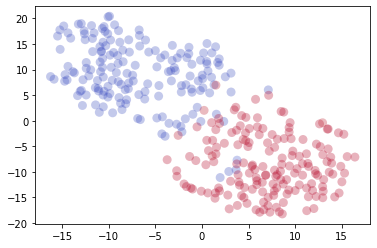

In [751]:
# Do not modify this cell
y_pred = NN.predict(data_train_final)  # y_pred of train
y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0) # can change original threshold of 0.5

X_embedded = TSNE(n_components=2).fit_transform(data_train_final)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

In [752]:
print("Scores on train data")
y_pred = NN.predict(data_train_final)  # y_pred of train
y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0) # can change original threshold of 0.5
print(classification_report(target_train_final, y_pred_class))

Scores on train data
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       167
         1.0       0.99      0.99      0.99       167

    accuracy                           0.99       334
   macro avg       0.99      0.99      0.99       334
weighted avg       0.99      0.99      0.99       334



In [753]:
print("Scores on test data")
y_pred = NN.predict(data_test_final) # y_pred of test
y_pred_class = np.where(y_pred>=optimum_threshold, 1, 0)
print(classification_report(target_test_final, y_pred_class))

Scores on test data
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        45
         1.0       0.96      1.00      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



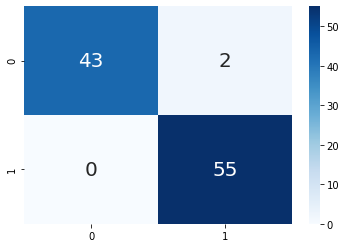

In [754]:
sns.heatmap(confusion_matrix(target_test_final, y_pred_class), annot=True, annot_kws={"size": 20}, cmap='Blues')

##### Expected results

**Projected Distribution Visualization**

![alt text](https://i.imgur.com/BoxMIKn.png)

**Confusion Matrix**

![alt text](https://i.imgur.com/8eVnQ8X.png)

### Phase 3: Notes

Ensure that only training data is used for training the model and present your scores and results for the testing data.



# References
- https://cs231n.github.io/neural-networks-2/#reg

# Evaluation

The scores for each problem is allocated as follows:

* P1: Completion of NN base class implementation - 3
* P1: Description of Backpropagation algorithm - 1
* P1: Successful run of Classification Tests (AND/XOR) - 3
* P1: Observations and Inferences (Reporting) - 2
* P1: Successful run of Regression Tests (Sine/Gaussian) - 3
* P1: Observations and Inferences (Reporting) - 2
* P2: Successful implementation of model improvement method:
    * 3 methods - 9
    * 5 methods - 9 + 1 bonus
* P3: Successful implementation of Breast Cancer Dataset - 3
* P3: Observations and Inferences (Reporting) - 2
* P3: Accuracy for Breast Cancer test data:
    * Accuracy < 90% (or not obtained) - 0
    * Accuracy >=90%, < 95% - 1
    * Accuracy >=95%, < 98% - 2
    * Accuracy >=98% - 2 + 1 bonus

The final score will be clipped to a maximum of 30




If you notice bugs in the above code or have suggestions to improve the content please contact Sivam Pillai (s.pillai@u.nus.edu)

---

END OF THE NOTEBOOK. WISH YOU ALL THE BEST

---